In [169]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# This is a function used for computing the missing rate of each variable, can only handle missing value is NaN
# We can also use a simpler form to do acheive this result DF.count() / DF.shape[0]
def computeVariableMissingRate(Var):
    return len(Var[Var.isnull()]) / len(Var)

#Find the value which has the largest frequecy in a Series
def findHighestCountValue(SSeries):
    return SSeries.value_counts().index[0]

fontdict = {'fontsize': 18,
        'fontweight' : 1,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

# Load Data

In [5]:
test = pd.read_csv("./input/test.csv")
train = pd.read_csv("./input/train.csv")

# 1 - Data Exploration

## 1.1 - Lowercase all columns' names

In [147]:
test.columns = (test.columns).str.lower()
train.columns = (train.columns).str.lower()

In [130]:
test.head(3)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [131]:
train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1.2 - Delete uesless variables

In [132]:
train_useful = train.drop(['name', 'ticket', 'passengerid'], axis=1)
test_useful = test.drop(['name', 'ticket', 'passengerid'], axis=1)

In [133]:
train_useful.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [134]:
test_useful.head(3)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q


In [135]:
# Explore the data type and number of non-missing values of each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [136]:
# Explore the missing rate of each variable
# These three are useful also, but not that simpler
# print(train.apply(computeVariableMissingRate, axis=0))
# print ('\n----------------\n')
# print(test.apply(computeVariableMissingRate, axis=0))


print(train.count() / train.shape[0])
print ('\n----------------\n')
print(test.count() / test.shape[0])

passengerid    1.000000
survived       1.000000
pclass         1.000000
name           1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
ticket         1.000000
fare           1.000000
cabin          0.228956
embarked       0.997755
dtype: float64

----------------

passengerid    1.000000
pclass         1.000000
name           1.000000
sex            1.000000
age            0.794258
sibsp          1.000000
parch          1.000000
ticket         1.000000
fare           0.997608
cabin          0.217703
embarked       1.000000
dtype: float64


## 1.3 - Delete variables that have too many missing values and impute others have missing values

### 1.3.1 - Drop 'cabin'

In [137]:
# I have not take the drop action on origin data, this is not suggested on big data set
train_dropt = train_useful.drop('cabin', axis=1)
test_dropt = test_useful.drop('cabin', axis=1)

In [138]:
#see whether the drop function has effect
train_dropt.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [139]:
#see whether the drop function has effect
test_dropt.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


### 1.3.2 - Impute 'embark', 'fare' and 'age'

In [141]:
train_dropt_imputed = train_dropt.copy()
test_dropt_imputed = test_dropt.copy()

train_dropt_imputed['embarked'].fillna(findHighestCountValue(train_dropt_imputed['embarked']), inplace=True)
train_dropt_imputed['age'].fillna(train_dropt_imputed['age'].mean(), inplace=True)


test_dropt_imputed['embarked'].fillna(findHighestCountValue(test_dropt_imputed['embarked']), inplace=True)
test_dropt_imputed['age'].fillna(test_dropt_imputed['age'].mean(), inplace=True)
test_dropt_imputed['fare'].fillna(test_dropt_imputed['fare'].mean(), inplace=True)

In [142]:
print(train_dropt_imputed.count() / train_dropt_imputed.shape[0])
print ('\n----------------\n')
print(test_dropt_imputed.count() / test_dropt_imputed.shape[0])

survived    1.0
pclass      1.0
sex         1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
embarked    1.0
dtype: float64

----------------

pclass      1.0
sex         1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
embarked    1.0
dtype: float64


# 2 - Feature Engineering

In [143]:
train_dropt_imputed.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

### 2.1 - variable 'pclass'
#### Pclass is a proxy for socio-economic status (SES) <font color='red'>1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower</font>

In [144]:
train_dropt_imputed['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [163]:
ax.set_title?

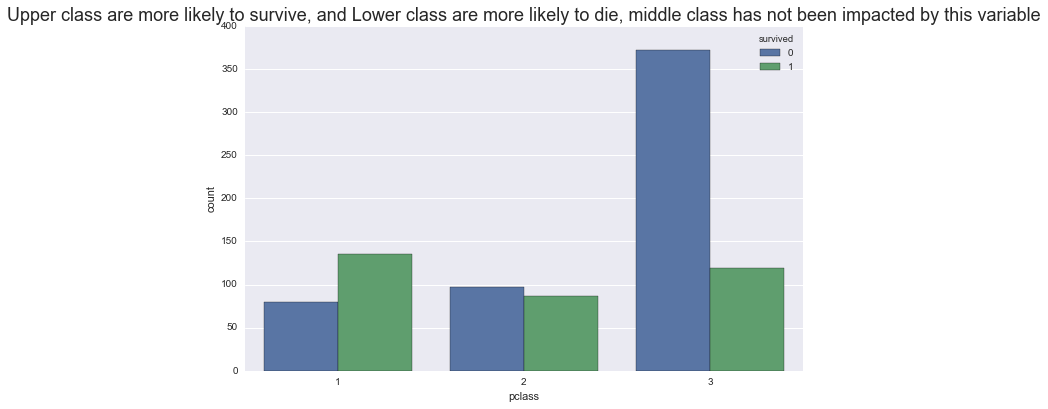

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6.18))
sb.countplot(x='pclass', hue='survived', data=train_dropt_imputed, ax=ax)

ax.set_title('Upper class are more likely to survive, and Lower class are more likely to die, \
middle class has not been impacted by this variable', fontdict=fontdict)

### 2.2 - variable 'sex'

In [148]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

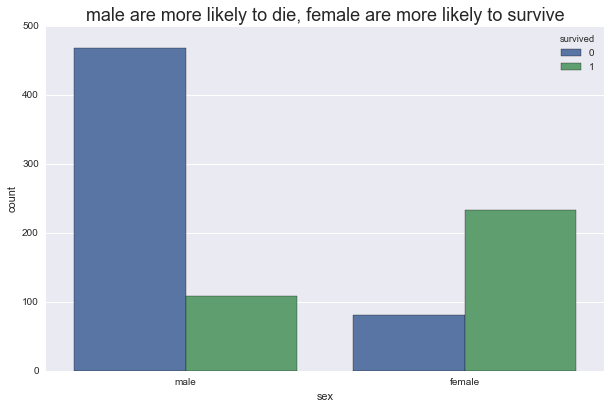

In [171]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 6.18))
sns.countplot(x='sex', hue='survived', data=train_dropt_imputed, ax=ax)
ax.set_title('male are more likely to die, female are more likely to survive', fontdict=fontdict)